In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
df_i = pd.read_csv('results_i.csv')
df_s = pd.read_csv('results_s.csv')

In [139]:
print(df_i.head())
print(df_s.head())

   iteration      area  repetition s_method
0          1  9.859574           1       MC
1          2  4.904654           1       MC
2          3  3.247150           1       MC
3          4  2.572336           1       MC
4          5  2.189062           1       MC
   num_s      area  repetition s_method
0    100  1.382301           1       MC
1    121  1.557815           1       MC
2    144  1.570796           1       MC
3    169  1.710216           1       MC
4    196  1.731082           1       MC


In [140]:
df_i_mc = df_i[df_i.s_method == 'MC']
df_i_lhs = df_i[df_i.s_method == 'LHS']
df_i_os = df_i[df_i.s_method == 'OS']

In [141]:
df_s_mc = df_s[df_s.s_method == 'MC']
df_s_lhs = df_s[df_s.s_method == 'LHS']
df_s_os = df_s[df_s.s_method == 'OS']

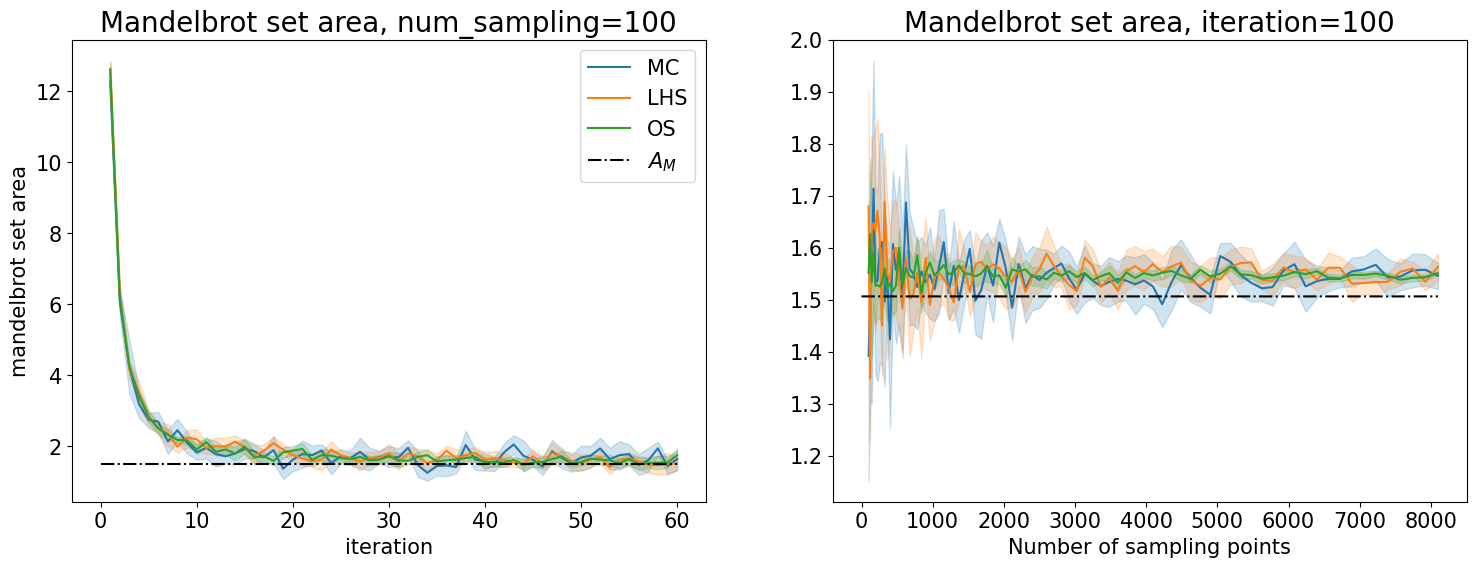

In [182]:
plt.rcParams['figure.figsize'] = (18, 6)
fig1, ax1 = plt.subplots(1, 2)

sns.lineplot(data=df_i, x='iteration', y='area', hue='s_method', errorbar='ci', ax=ax1[0])
sns.lineplot(data=df_s, x='num_s', y='area', hue='s_method', errorbar='ci', ax=ax1[1])

ax1[0].plot(np.arange(0, 61), np.repeat([1.506484], 61), 'k-.', label=r'$A_M$', zorder=6)
ax1[1].plot(np.arange(0, 90**2), np.repeat([1.506484], 90**2), 'k-.', label=r'$A_M$', zorder=4)


ax1[0].set_title('Mandelbrot set area, num_sampling=100', fontsize=20)
ax1[0].set_xlabel('iteration', fontsize=15)
ax1[0].set_ylabel('mandelbrot set area', fontsize=15)
ax1[0].tick_params(axis='both', which='major', labelsize=15)
ax1[0].legend(fontsize=15)

ax1[1].set_title('Mandelbrot set area, iteration=100', fontsize=20)
ax1[1].set_xlabel('Number of sampling points', fontsize=15)
ax1[1].set_ylabel('')
ax1[1].tick_params(axis='both', which='major', labelsize=15)
ax1[1].get_legend().remove()

plt.show()

In [183]:
fig1.savefig('i-s experiments.pdf', bbox_inches='tight')